###### Breast Cancer Wisconsin (Diagnostic) Data Set: Predict whether the cancer is benign or malignant 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin)This analysis has been done using Basic Machine Learning Algorithm with detailed explanation.


In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
%matplotlib inline
from numpy.linalg import norm
from numpy import dot, loadtxt, array, argsort, zeros, equal, set_printoptions, select, log, divide, zeros_like, repeat, tile, unique, nditer, negative, where
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sys
set_printoptions(threshold=sys.maxsize)
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

In [2]:
%pwd

'C:\\Users\\sari2\\Downloads'

###### Import the dataset

In [3]:
b_cancer = pd.read_csv("C:\\Users\\sari2\\Downloads\\data.csv", sep=',')
b_cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###### Let's look at the list of fields in the dataset

In [4]:
b_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

###### Attribute Information:

1) ID number (Patient ID number) 2) Diagnosis (Cancer type: M = malignant, B = benign) 3) Column 3-32 are divided into three parts first is Mean (3-13), Stranded Error(13-23) and Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension) a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)


###### Let's do some pre-checks regarding the dataset. Firstly, let's check the datatypes of the variables in dataset

In [5]:
b_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

###### The data types of the variables seems good per the data values. Now, let's check nulls in the dataset: There is no null values present in dataset

In [6]:
b_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

###### Now, let's look at the target variable - diagnosis, which could either Malignant (M) or Benign(B). Let's look at the distribution of this variable

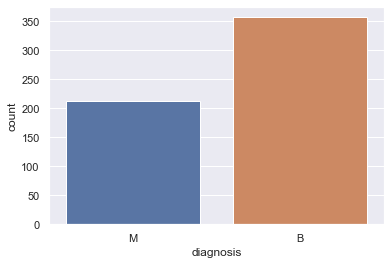

In [7]:
sns.countplot(b_cancer['diagnosis'])

In [8]:
b_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

###### Number of Benign: 357 Number of Malignant : 212. There are more number of bengin cases than malignant in the dataset and the dataset looks unbaised/unblanced but its not that big diffrenece and wont impact the analysis in any ways.

###### Now, we will look at the summary statistic of all the numeric variables within the dataset.

In [9]:
b_cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].describe(include="all")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###### Now, let's look at the distribution of the features in terms of Malignant and Benign cases. This will help us understand the impact of the features on the target variable

In [10]:
# y includes our target variable and x includes our independent variables
y = b_cancer.diagnosis    # M or B 
x = b_cancer.iloc[:,2:]   # Features   
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


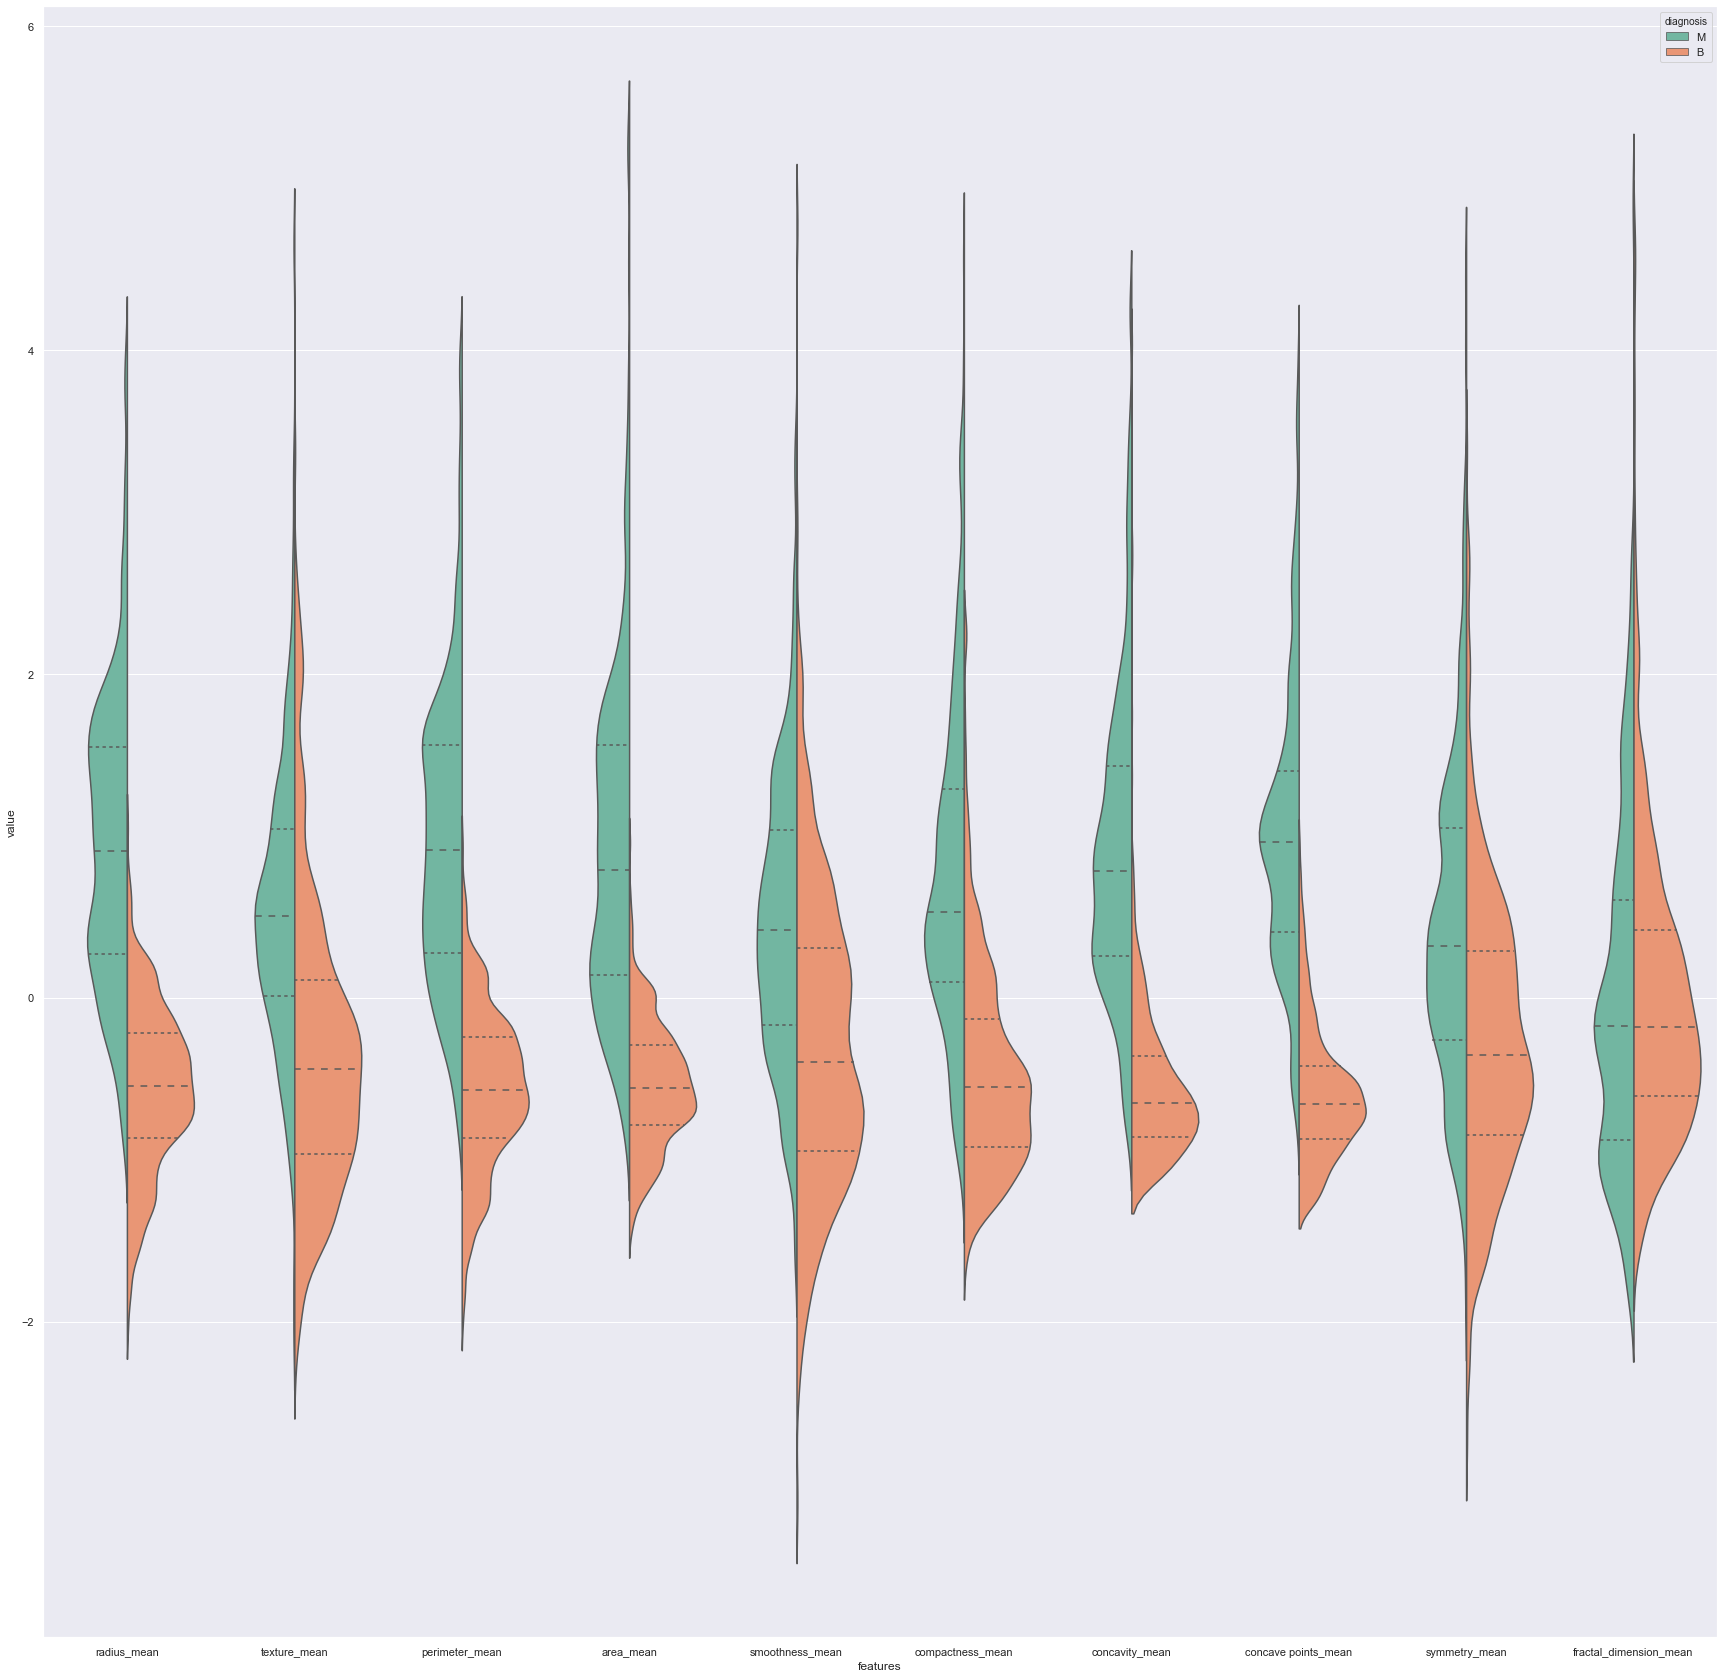

In [11]:
data_n_2 = (x - x.mean()) / (x.std())              # standardization 
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,30))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True,palette='Set2',scale_hue=False, bw=.2,scale="count",inner="quartile")

###### The above violin plot shows the distribution  for radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, and symmetry_mean features which states that the median of the Malignant and Benign cases are well separated from each other, so these variables are are pretty good for classification. However, the median of  fractal_dimension_mean variable is not  well separated, so it is not a good variable  for classification.

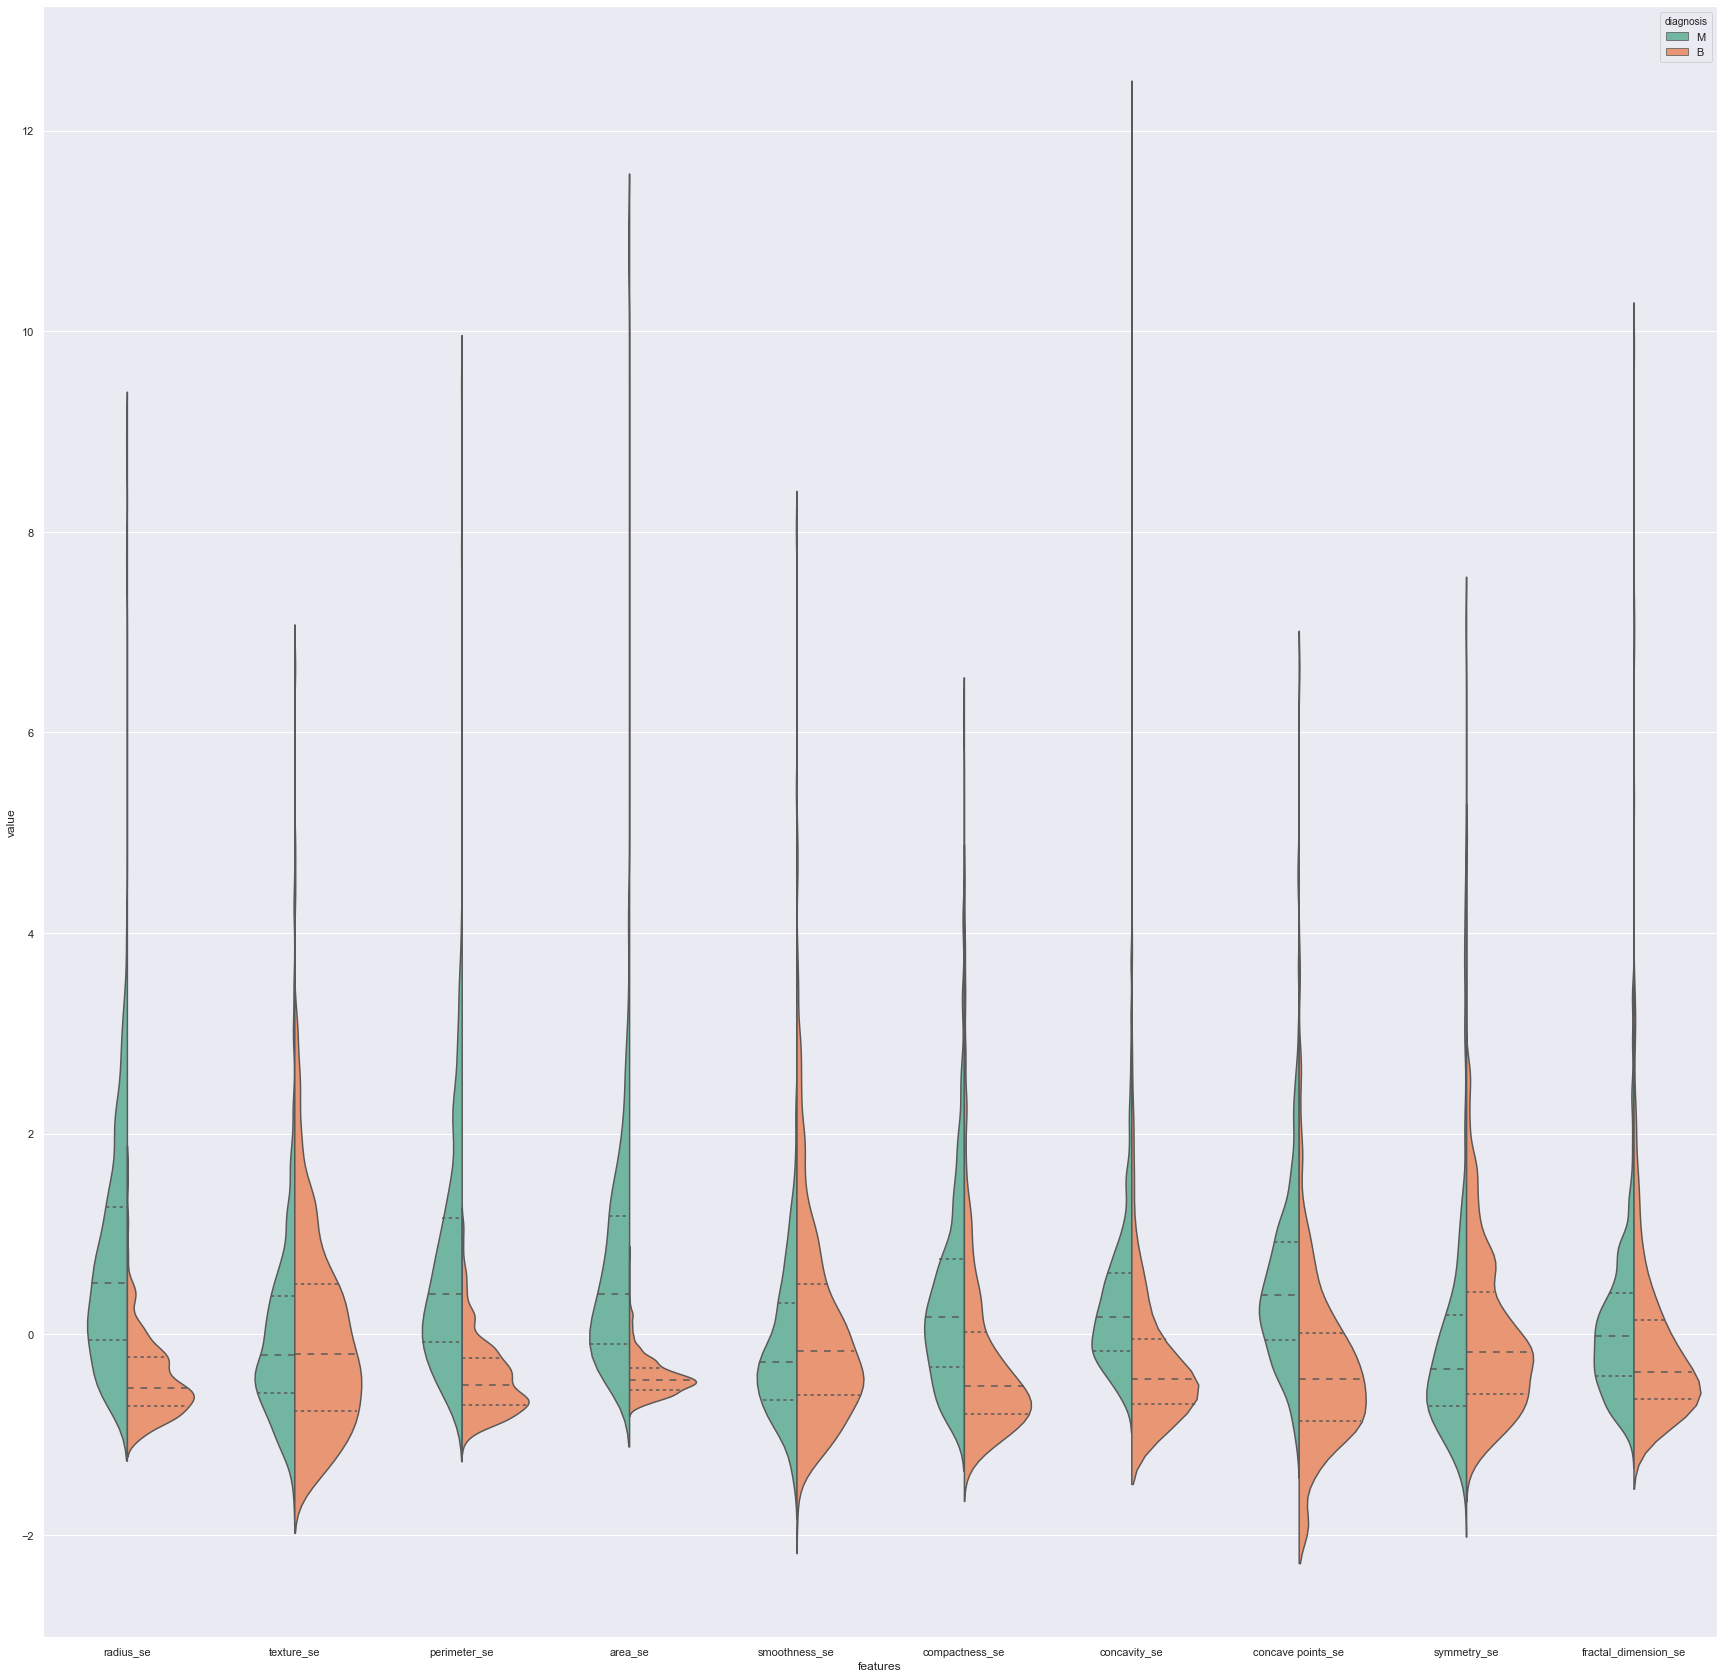

In [12]:
data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,30))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True,palette='Set2',scale_hue=False, bw=.2,scale="count",inner="quartile")


###### The above violin plot shows the distribution of radius_se, perimeter_se, area_se, compactness_se, concavity_se, concave points_se features which states that the median of  the Malignant and Benign cases are well separated from each other, so these variables are are pretty good for classification. However, the median of  texture_se, smoothness_se, symmetry_se and fractal_dimension_mean features are not well separated, so they  are  not a good set of  variables  for classification.

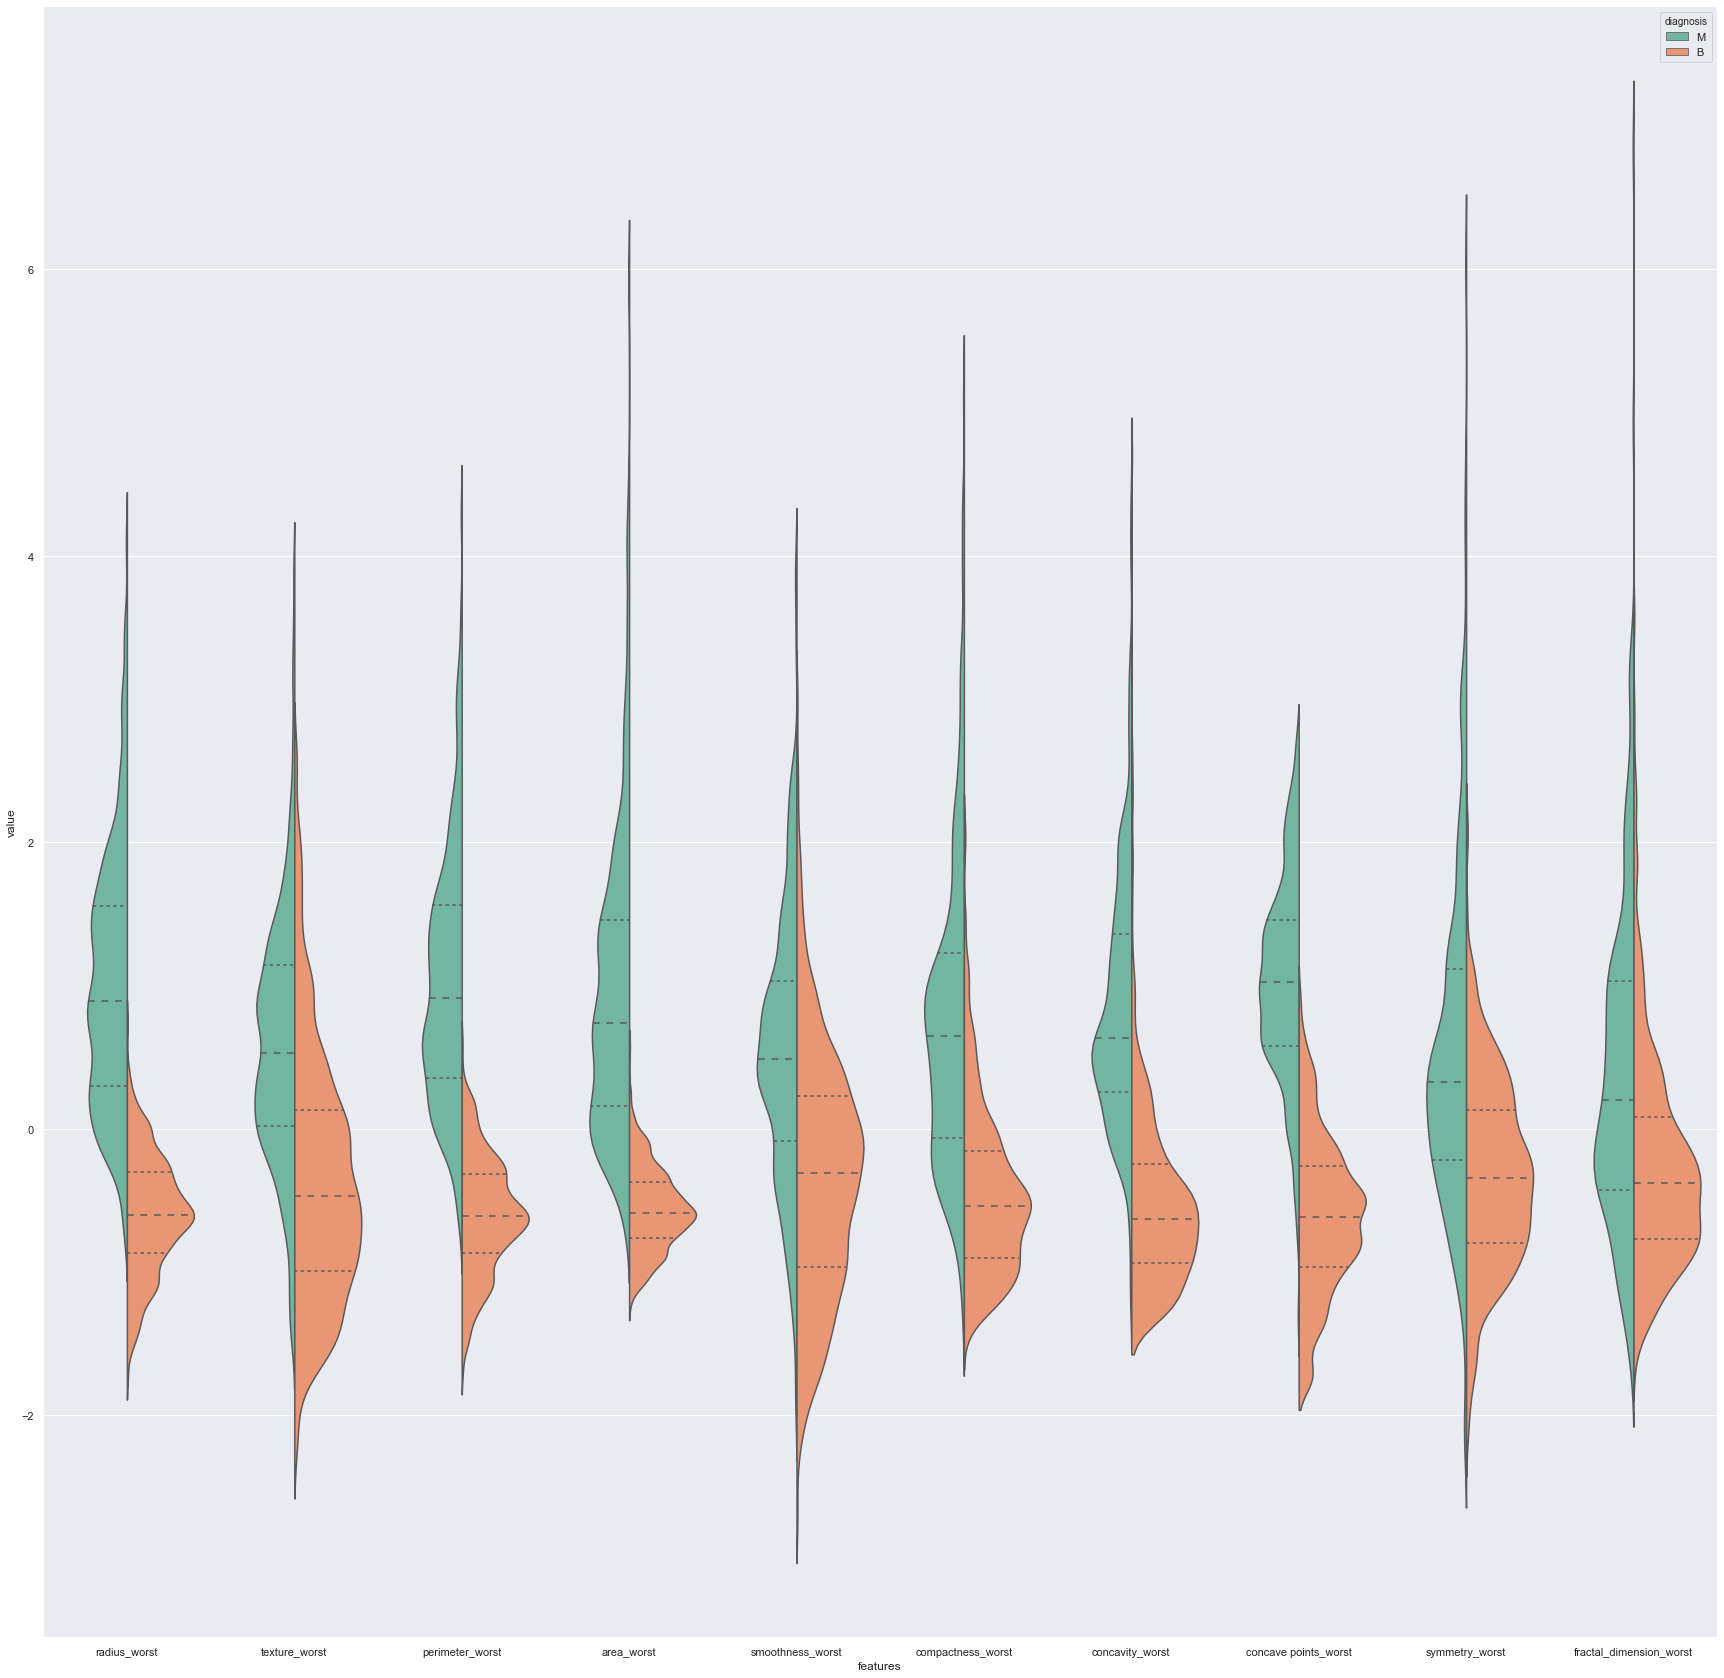

In [13]:
data_n_2 = (x - x.mean()) / (x.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,30))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True,palette='Set2',scale_hue=False, bw=.2,scale="count",inner="quartile")


###### The above violin plot shows the distribution of  radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst and fractal_dimension_worst features,which states that the median of  the Malignant and Benign cases are well separated from each other, so these variables are are pretty good for classification.

###### We found that these below mentioned five variables have higher values in five different PCA components so to analyse that we performed histogram, probability plot for these variables.

###### Let's first look at the distribution of radius_mean feature by the diagnosis type.

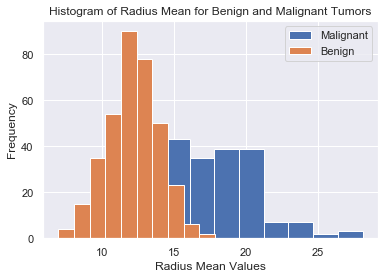

In [14]:
m = plt.hist(b_cancer[b_cancer["diagnosis"] == "M"].radius_mean,bins=10,label = "Malignant")
b = plt.hist(b_cancer[b_cancer["diagnosis"] == "B"].radius_mean,bins=10,label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Benign and Malignant Tumors")
plt.show()

######We can see that the Malignant cancer has much higher values for radius_mean when  compared with  Benign cancer. So our findings were true, radius_mean is a good variable  for identifying Malignant cancer.

###### We will Analyse the probability of malignant tumour using  cases for radius_mean variable, as a way to see the probability of a patient havinig a malignant cancer based on the value of radius_mean of the cells.

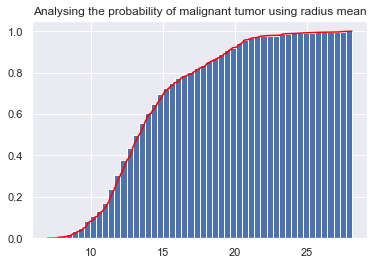

In [15]:
plt.hist(b_cancer.radius_mean,bins=50,label='Benign',density = True,cumulative = True)
sorted_data = np.sort(b_cancer.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('Analysing the probability of malignant tumor using radius mean')
plt.show()

###### From the above plot we can analyse that for the cells with radius_mean of 20 has 85% probability of being malignant cancer. This can be useful for early stage cancer detection.

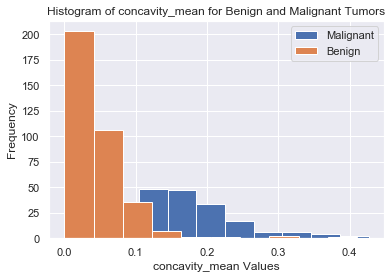

In [16]:
m = plt.hist(b_cancer[b_cancer["diagnosis"] == "M"].concavity_mean,bins=10,label = "Malignant")
b = plt.hist(b_cancer[b_cancer["diagnosis"] == "B"].concavity_mean,bins=10,label = "Benign")
plt.legend()
plt.xlabel("concavity_mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of concavity_mean for Benign and Malignant Tumors")
plt.show()

###### We can see that the malignant cancer has much higher values for Concavity_mean when  compared with  Benign cancer. So our findings were true, Concavity_mean is a good variable  for Malignant Benign cancer.

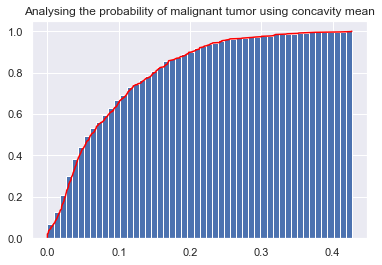

In [17]:
plt.hist(b_cancer.concavity_mean,bins=50,label='Benign',density = True,cumulative = True)
sorted_data = np.sort(b_cancer.concavity_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('Analysing the probability of malignant tumor using concavity mean')
plt.show()

###### From the above plot we can analyse that for the cells with Concavity_mean of 0.4 has 100% probability of being Malignant  cancer. This can be useful for early stage cancer detection.

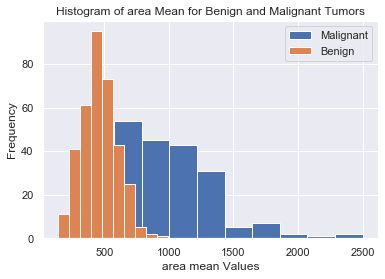

In [18]:
m = plt.hist(b_cancer[b_cancer["diagnosis"] == "M"].area_mean,bins=10,label = "Malignant")
b = plt.hist(b_cancer[b_cancer["diagnosis"] == "B"].area_mean,bins=10,label = "Benign")
plt.legend()
plt.xlabel("area mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of area Mean for Benign and Malignant Tumors")
plt.show()

###### We can see that the Malignant cancer has much higher values for area_mean when  compared with Benign cancer. So our findings were true, area_mean is a good variable  for identifying Malignant cancer.

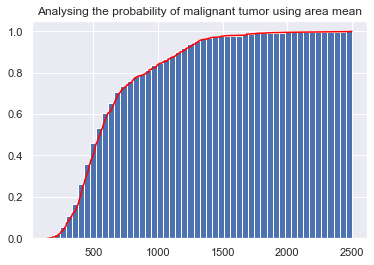

In [19]:
plt.hist(b_cancer.area_mean,bins=50,label='Benign',density = True,cumulative = True)
sorted_data = np.sort(b_cancer.area_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('Analysing the probability of malignant tumor using area mean')
plt.show()

###### From the above plot we can analyse that for the cells with area_mean of 2000 has 100% probability of being Malignant  cancer. This can be useful for early stage cancer detection.

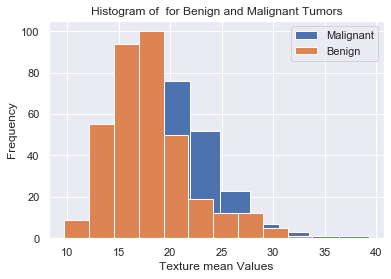

In [20]:
m = plt.hist(b_cancer[b_cancer["diagnosis"] == "M"].texture_mean,bins=10,label = "Malignant")
b = plt.hist(b_cancer[b_cancer["diagnosis"] == "B"].texture_mean,bins=10,label = "Benign")
plt.legend()
plt.xlabel("Texture mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of  for Benign and Malignant Tumors")
plt.show()

###### We can see that the Malignant cancer as well as Benign Cancer  has much higher values for Texture_mean. So our findings were true, Texture_mean  is not  a good variable  for identifying cancer.

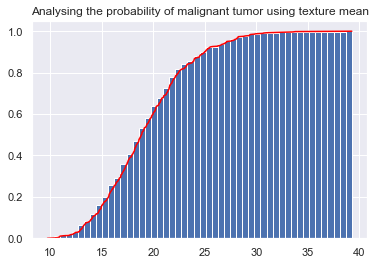

In [21]:
plt.hist(b_cancer.texture_mean,bins=50,label='Benign',density = True,cumulative = True)
sorted_data = np.sort(b_cancer.texture_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('Analysing the probability of malignant tumor using texture mean')
plt.show()

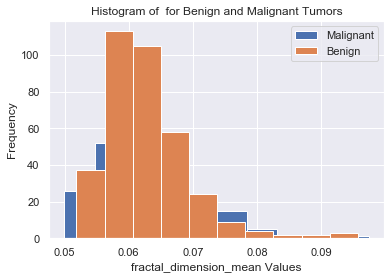

In [22]:
#fractal_dimension_mean
m = plt.hist(b_cancer[b_cancer["diagnosis"] == "M"].fractal_dimension_mean,bins=10,label = "Malignant")
b = plt.hist(b_cancer[b_cancer["diagnosis"] == "B"].fractal_dimension_mean,bins=10,label = "Benign")
plt.legend()
plt.xlabel("fractal_dimension_mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of  for Benign and Malignant Tumors")
plt.show()

###### We can see that the Malignant cancer as well as Benign Cancer  has much higher values for fractal_dimension_mean. So our findings were true,  fractal_dimension_mean  is not  a good variable  for identifying cancer.

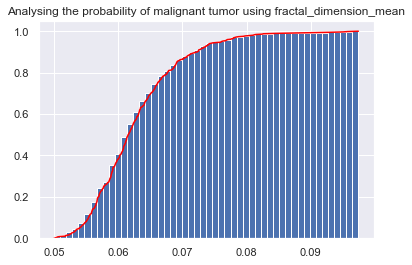

In [23]:
plt.hist(b_cancer.fractal_dimension_mean,bins=50,label='Benign',density = True,cumulative = True)
sorted_data = np.sort(b_cancer.fractal_dimension_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('Analysing the probability of malignant tumor using fractal_dimension_mean')
plt.show()

In [24]:
# for further analaysis we will not be requiring ID field and hence dropping the same.
b_cancer = b_cancer.drop('id',axis=1)        
b_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###### correlation matrix: We have created heatmap to observe the correlation between features.

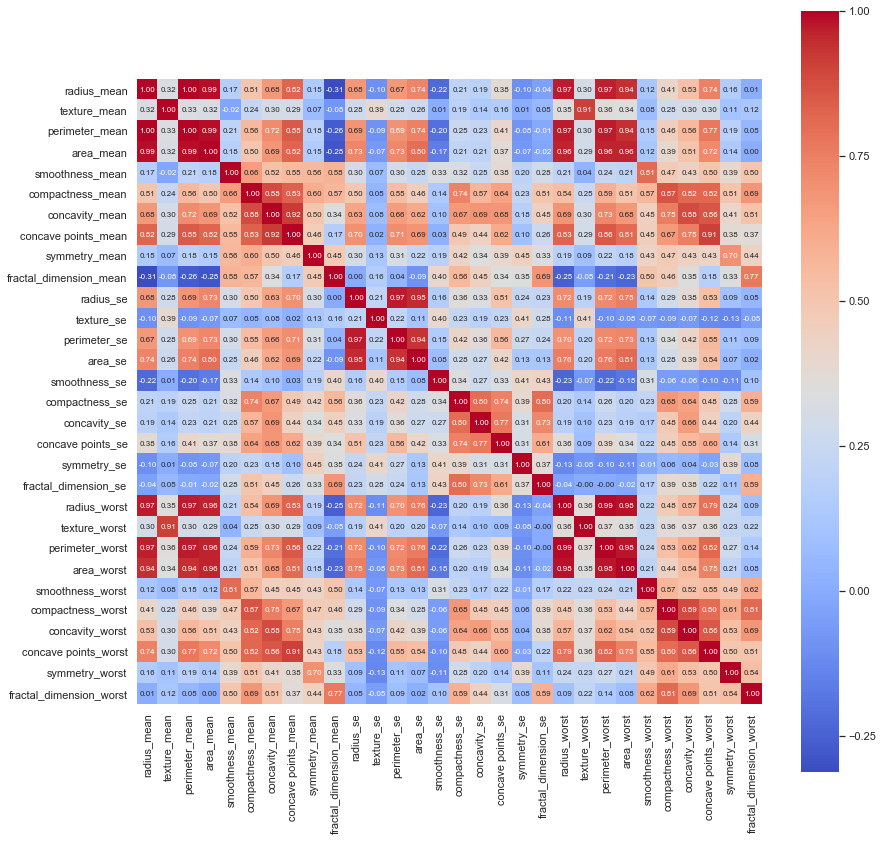

In [25]:
corr = b_cancer.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')

##### Observation removed for Mean: The radius_mean, perimeter_mean, area_mean and concavepoint_mean are highly correlated as expected, so we will use anyone of them. The compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean. So, selected Parameter for use is perimeter_mean, texture_mean, smoothness_mean, compactness_mean, symmetry_mean and fractal_dimension_mean.
###### Observation removed for standard error: The radius_se, perimeter_se, area_se and concavepoint_se are highly correlated as expected, so we will use anyone of them. The compactness_se, concavity_se and concavepoint_se are highly correlated so we will use compactness_se. So, selected Parameter for use is perimeter_se, texture_se, smoothness_se, compactness_se, symmetry_se and fractal_dimension_se.
###### Observation removed  for Worst cases: The radius_worst, perimeter_worst, area_worst and concavepoint_worst are highly correlated as expected, so we will use anyone of them. The compactness_worst, concavity_worst and concavepoint_worst are highly correlated so we will use compactness_worst. So, selected Parameter for use is perimeter_worst, texture_worst, smoothness_worst, compactness_worst, symmetry_worst and fractal_dimension_worst.


###### After identifying all the correlation among variables in the dataset, we can remove the variables which are highly correlated with to avoid the multi collinearity issue.

In [26]:
drop_list=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
b_cancer= b_cancer.drop(drop_list,axis = 1) 
b_cancer.head()


,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


###### Rerunning the correlation matrix to verify whether there is any variables in the dataset that depicts mutticolinearity in dataset.

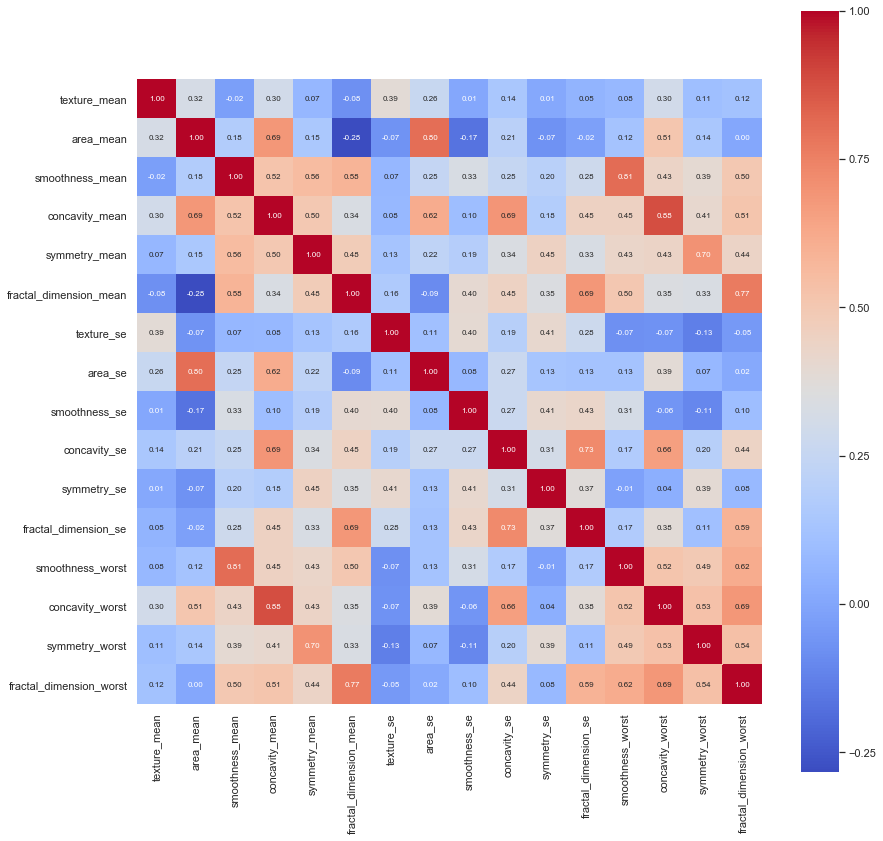

In [27]:
corr = b_cancer.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},cmap= 'coolwarm')

In [28]:
b_cancer.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
# y includes our labels and x includes our features
y = b_cancer[['diagnosis']]
x = b_cancer[['texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

###### Now will normalize the dataset for futher processing

In [30]:
from sklearn import decomposition
xnorm = (x-x.mean())/(x.max()-x.min())

###### PCA

Text(0, 0.5, 'explained_variance_ratio_')

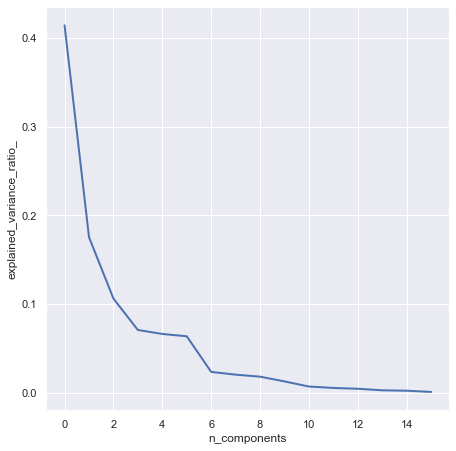

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
pcatrans = pca.fit(xnorm)
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

###### From the above plot we can say that the optimal number of principle components that we should use is five. These five prinicple components explains 84% variance in data.

In [32]:
pca = decomposition.PCA(n_components=5)
newpcadata = pca.fit(xnorm).transform(xnorm)
print(pca.explained_variance_ratio_.sum())

0.833447767457243


###### Each coefficient represents the correlation between a particular pair of component and feature

In [33]:
pca_desc = pd.DataFrame(pca.components_,columns=xnorm.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
pca_desc

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
PC-1,0.118367,0.203695,0.269238,0.499510,0.280191,0.262652,0.032085,0.114210,0.063802,0.144994,0.094403,0.143682,0.311115,0.434620,0.226534,0.263205
PC-2,0.275506,0.542430,-0.184938,0.289291,-0.160893,-0.470969,-0.064077,0.217705,-0.204372,0.005071,-0.176728,-0.137388,-0.197170,0.199760,-0.086747,-0.185925
PC-3,0.409557,-0.014107,-0.111670,0.071180,0.072781,0.071242,0.605150,0.095329,0.269849,0.129086,0.388815,0.199051,-0.302957,-0.141727,-0.143999,-0.126397
PC-4,-0.393480,0.187096,0.058272,0.011914,0.497537,-0.199520,-0.084645,0.131030,-0.048252,-0.065233,0.446067,-0.133632,-0.174874,-0.181933,0.364818,-0.273417
PC-5,-0.436707,-0.060140,-0.324286,0.220446,-0.117474,0.203359,-0.173718,-0.027059,-0.118920,0.285956,0.078871,0.323977,-0.521608,0.224212,-0.132198,0.137588


###### Now we will split the dataset in 70% train and 30% test set for further analysis.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(newpcadata, y, test_size=0.3,random_state=42)

###### We will now train the logistic regression model on the training dataset and use it to classify the test dataset. Since we are using different cassification algorithm, we will also calculate the run time of various algorithm to determine the efficiency of various algorithms.

In [35]:
from sklearn.linear_model import LogisticRegression
import time
start_time = time.time()

In [36]:
logisticRegr = LogisticRegression()

In [37]:
logisticRegr.fit(x_train, y_train)

C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
prediction = logisticRegr.predict(x_test)

In [39]:
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.047872304916381836 seconds ---


###### Now, let's calculate the accuracy score of the model on training and test dataset. We will also calculate the precision, recall, f-score and support of this model on the test dataset.

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96       108
           M       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [42]:
print("Logistic Regression Training Dataset Accuracy: {}".format(logisticRegr.score(x_train,y_train)))

Logistic Regression Training Dataset Accuracy: 0.9396984924623115


In [43]:
print("Logistic Regression Test Dataset Accuracy: {}".format(logisticRegr.score(x_test,y_test)))

Logistic Regression Test Dataset Accuracy: 0.9473684210526315


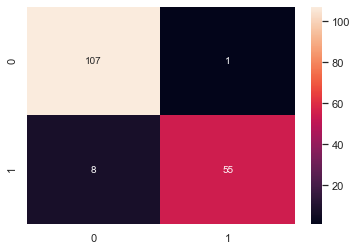

In [44]:
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt="d")

###### We will now train the Random Forest classifier model on the training dataset and use it to classify the test dataset.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import time
start_time = time.time()
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.03095388412475586 seconds ---


C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sari2\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [46]:
print(classification_report(y_test, clf_rf.predict(x_test)))

              precision    recall  f1-score   support

           B       0.94      0.94      0.94       108
           M       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [47]:
print("Random forest Training Dataset Accuracy: {}".format(clr_rf.score(x_train, y_train)))

Random forest Training Dataset Accuracy: 0.9899497487437185


In [48]:
print ("Random forest Test Dataset Accuracy: {}".format(clr_rf.score(x_test, y_test)))

Random forest Test Dataset Accuracy: 0.9298245614035088


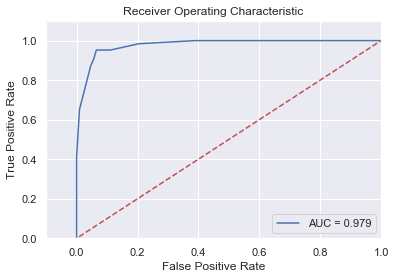

In [49]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='M')
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([-1, 2], [-1, 2],'r--')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

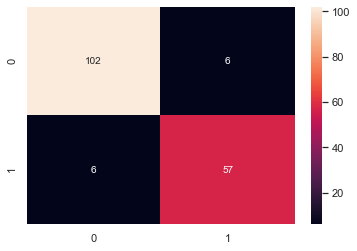

In [50]:
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

###### We will now train the KNN classifier model on the training dataset and use it to classify the test dataset.

In [51]:
from sklearn import neighbors, tree, naive_bayes
import time
start_time = time.time()

In [52]:
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(x_train,y_train)

C:\Users\sari2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [53]:
knnpreds_test = knnclf.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.025931835174560547 seconds ---


In [54]:
print (knnpreds_test)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']


In [55]:
print(classification_report(y_test, knnpreds_test))

              precision    recall  f1-score   support

           B       0.95      0.96      0.96       108
           M       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [56]:
print("KNN classifier Training Dataset Accuracy: {}".format(knnclf.score(x_train, y_train)))

KNN classifier Training Dataset Accuracy: 1.0


In [57]:
print("KNN classifier Test Dataset Accuracy: {}".format(knnclf.score(x_test, y_test)))

KNN classifier Test Dataset Accuracy: 0.9473684210526315


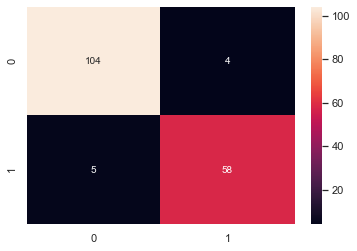

In [58]:
cm = confusion_matrix(y_test,knnpreds_test)
sns.heatmap(cm,annot=True,fmt="d")

###### We will now train the DecisionTree classifier model on the training dataset and use it to classify the test dataset.

In [59]:
import time
start_time = time.time()
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [60]:
treeclf = treeclf.fit(x_train,y_train)

In [61]:
treepreds_test = treeclf.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))
print (treepreds_test)

--- 0.024935245513916016 seconds ---
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B']


In [62]:
print("Decision Tree classifier Training Dataset Accuracy: {}".format(treeclf.score(x_test,y_test)))

Decision Tree classifier Training Dataset Accuracy: 0.9415204678362573


In [63]:
print("Decision Tree classifier Test Dataset Accuracy: {}".format(treeclf.score(x_train,y_train)))

Decision Tree classifier Test Dataset Accuracy: 0.9974874371859297


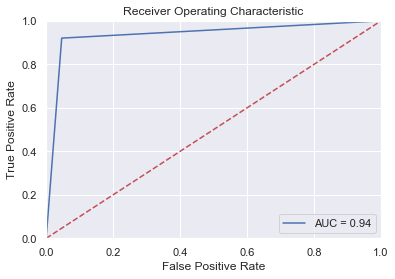

In [64]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = treeclf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='M')
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, treepreds_test))

              precision    recall  f1-score   support

           B       0.95      0.95      0.95       108
           M       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



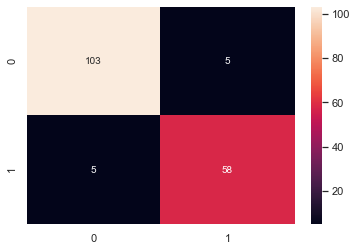

In [66]:
cm = confusion_matrix(y_test,treepreds_test)
sns.heatmap(cm,annot=True,fmt="d")

In [67]:
system(dot -Tpng tree.dot -o dtree.png)

[]

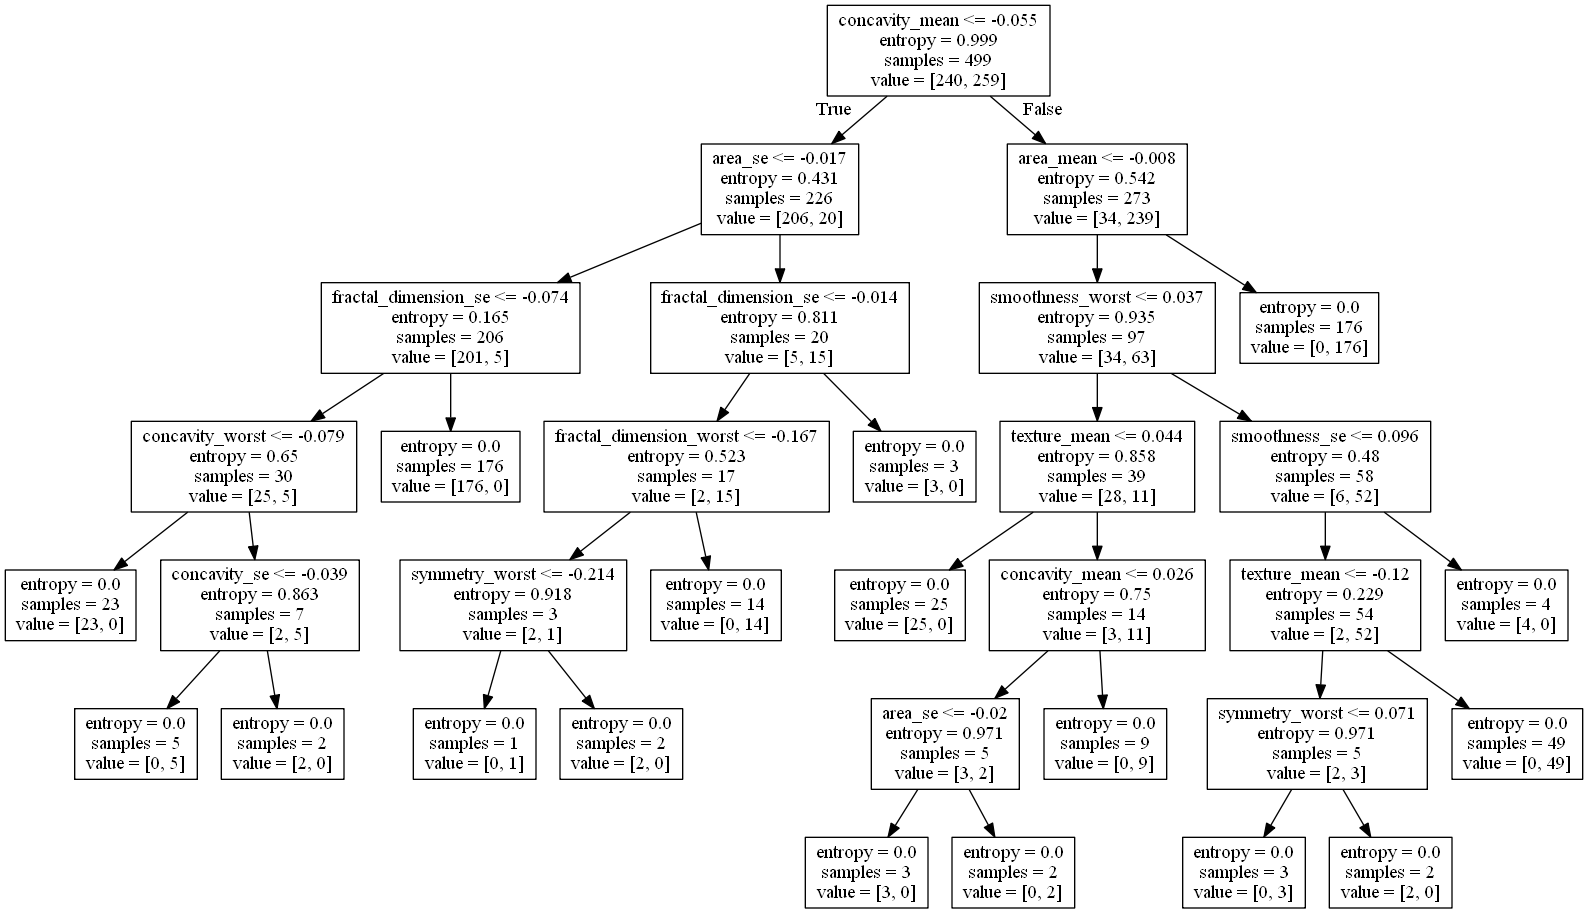

In [68]:
from IPython.display import Image
Image(filename='dtree.png', width=800)

###### We will now train the Support vector machine classifier model on the training dataset and use it to classify the test dataset.

In [69]:
from sklearn import svm
import time
start_time = time.time()

In [70]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmmodel = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.01895308494567871 seconds ---


C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [72]:
print("support vector machine classifier Test Dataset Accuracy: {}".format(svmmodel.score(x_test,y_test)))

support vector machine classifier Test Dataset Accuracy: 0.9649122807017544


In [73]:
print("support vector machine classifier train Dataset Accuracy: {}".format(svmmodel.score(x_train,y_train)))

support vector machine classifier train Dataset Accuracy: 0.957286432160804


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



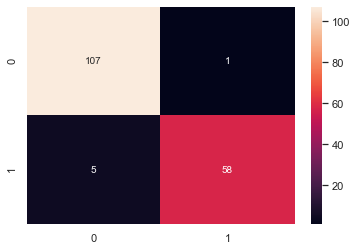

In [75]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

###### Now we will perform all the above disussed classification techniques without applying PCA and splitting train and test and trying all these methods.

In [76]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(xnorm, y, test_size=0.3,random_state=42)

###### We will now train the logistic regression model on the training dataset and use it to classify the test dataset. Since we are using different cassification algorithm, we will also calculate the run time of various algorithm to determine the efficiency of various algorithms

In [77]:
import time
start_time = time.time()
logisticRegr.fit(x_train, y_train)

C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
prediction = logisticRegr.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.01695537567138672 seconds ---


In [79]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96       108
           M       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [80]:
print("Logistic regression train Dataset Accuracy: {}".format(logisticRegr.score(x_train,y_train)))

Logistic regression train Dataset Accuracy: 0.9396984924623115


In [81]:
print("Logistic regression test Dataset Accuracy: {}".format(logisticRegr.score(x_test,y_test)))

Logistic regression test Dataset Accuracy: 0.9473684210526315


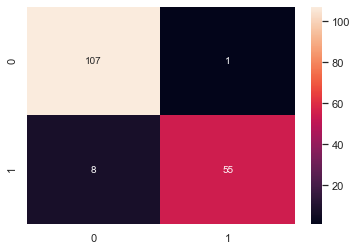

In [82]:
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt="d")

###### We will now train the Random Forest classifier model on the training dataset and use it to classify the test dataset.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import time
start_time = time.time()

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)


end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))


--- 0.025936126708984375 seconds ---


C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sari2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [84]:
print(classification_report(y_test, clf_rf.predict(x_test)))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [85]:
print("Random forest train Dataset Accuracy: {}".format(clr_rf.score(x_train, y_train)))

Random forest train Dataset Accuracy: 0.9949748743718593


In [86]:
print ("Random forest test Dataset Accuracy: {}".format(clr_rf.score(x_test, y_test)))

Random forest test Dataset Accuracy: 0.9532163742690059


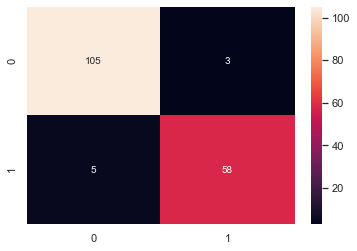

In [87]:
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

###### We will now train the KNN classifier model on the training dataset and use it to classify the test dataset.

In [88]:
n_neighbors = 5
import time
start_time = time.time()

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(x_train,y_train)

C:\Users\sari2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [89]:
knnpreds_test = knnclf.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.02393317222595215 seconds ---


In [90]:
print (knnpreds_test)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']


In [91]:
print(classification_report(y_test, knnpreds_test))

              precision    recall  f1-score   support

           B       0.95      0.95      0.95       108
           M       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [92]:
print ("KNN classifier train Dataset Accuracy: {}".format(knnclf.score(x_train, y_train)))

KNN classifier train Dataset Accuracy: 1.0


In [93]:
print ("KNN classifier test Dataset Accuracy: {}".format(knnclf.score(x_test, y_test)))

KNN classifier test Dataset Accuracy: 0.9415204678362573


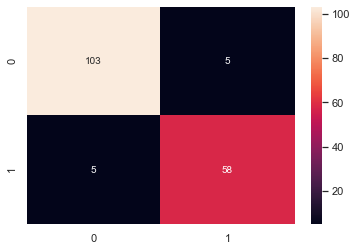

In [94]:
cm = confusion_matrix(y_test,knnpreds_test)
sns.heatmap(cm,annot=True,fmt="d")

###### We will now train the DecisionTree classifier model on the training dataset and use it to classify the test dataset.

In [95]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
import time
start_time = time.time()

In [96]:
treeclf = treeclf.fit(x_train,y_train)

In [97]:
treepreds_test = treeclf.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))
print (treepreds_test)

--- 0.020946979522705078 seconds ---
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B']


In [98]:
print ("Decision Tree classifier test Dataset Accuracy: {}".format(treeclf.score(x_test,y_test)))

Decision Tree classifier test Dataset Accuracy: 0.935672514619883


In [99]:
print ("Decision Tree classifier train Dataset Accuracy: {}".format(treeclf.score(x_train,y_train)))

Decision Tree classifier train Dataset Accuracy: 1.0


In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, treepreds_test))

              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



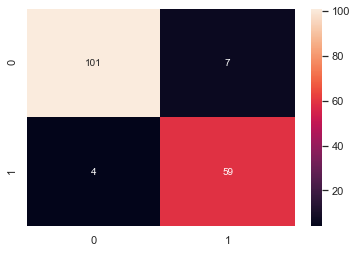

In [101]:
cm = confusion_matrix(y_test,treepreds_test)
sns.heatmap(cm,annot=True,fmt="d")

In [102]:
system(dot -Tpng tree.dot -o dtreewithoutpca.png)

[]

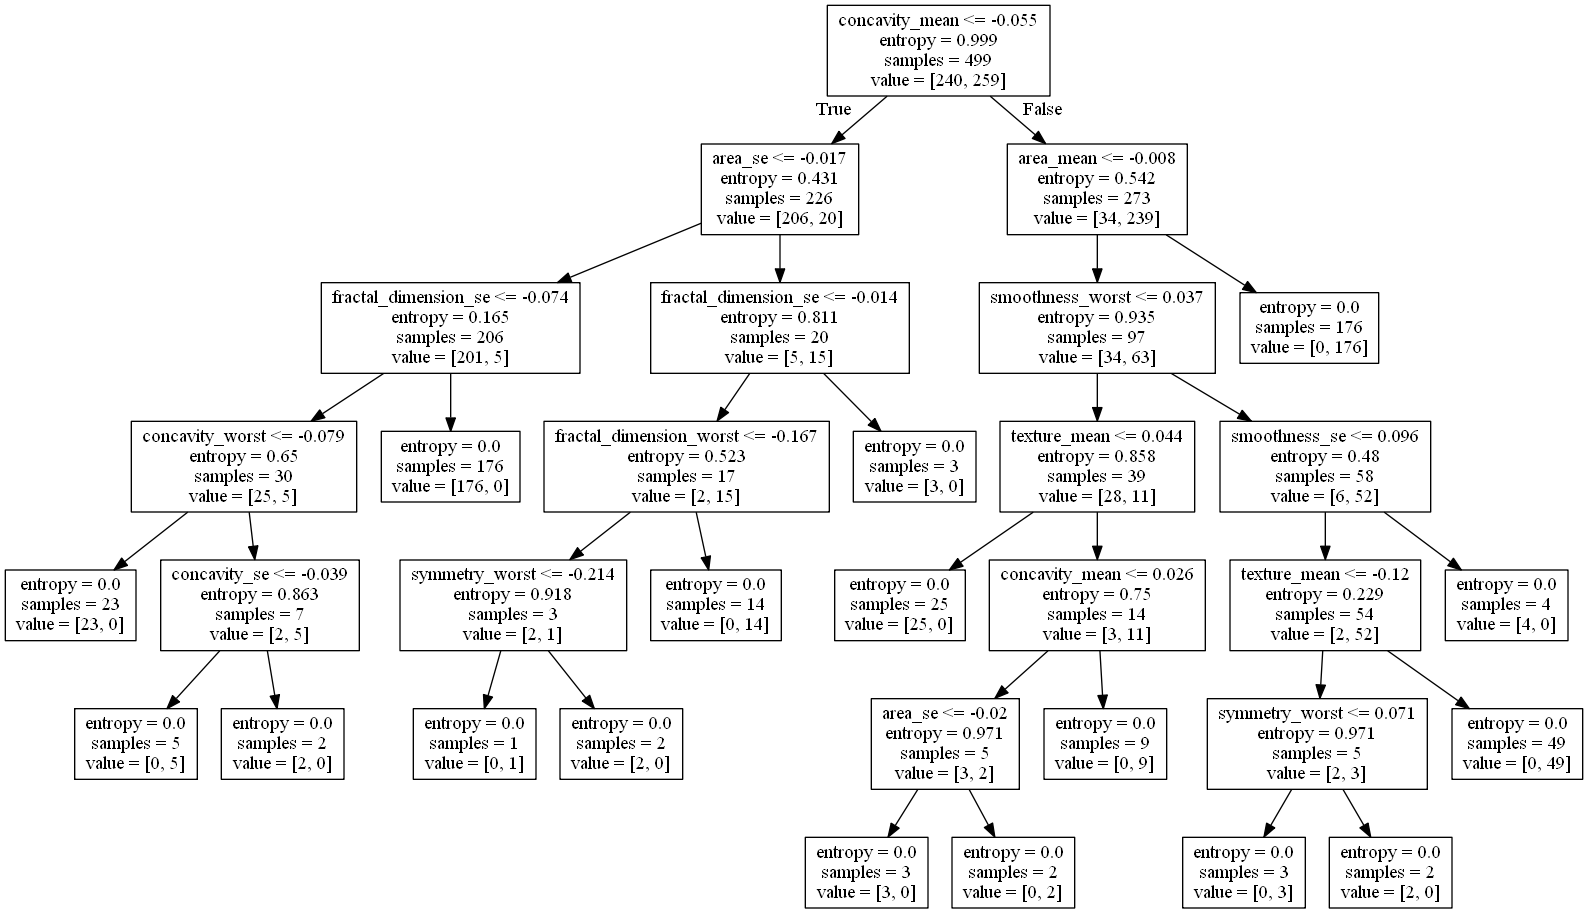

In [103]:
from IPython.display import Image
Image(filename='dtreewithoutpca.png', width=800)

###### We will now train the Support vector machine classifier model on the training dataset and use it to classify the test dataset.

In [104]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
import time
start_time = time.time()

#Train the model using the training sets
svmmodel = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))

--- 0.004949808120727539 seconds ---


C:\Users\sari2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [106]:
print ("support vector machine classifier Train Dataset Accuracy: {}".format(svmmodel.score(x_train,y_train)))

support vector machine classifier Train Dataset Accuracy: 0.9623115577889447


In [107]:
print ("support vector machine classifier Test Dataset Accuracy: {}".format(svmmodel.score(x_test,y_test)))

support vector machine classifier Test Dataset Accuracy: 0.9649122807017544


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97       108
           M       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



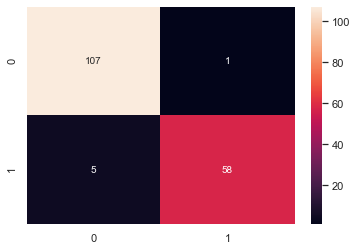

In [109]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")